Hydrophobic interface between M2 and M4 on other subunit, that changes to new interactions within a subunit.

In [1]:
import numpy as np
import MDAnalysis
import matplotlib
import matplotlib.pyplot as plt

In [2]:
u = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/analysis/md-c.xtc')
protein = u.select_atoms('protein')

In [13]:
res_i = protein.select_atoms('resid 194 195 and segid A').center_of_mass()
res_j = protein.select_atoms('resid 195 and segid A')
res_m = protein.select_atoms('resid 316 320 and segid B').center_of_mass()
res_n = protein.select_atoms('resid 276 and segid B')

In [14]:
dis = np.linalg.norm(res_i - res_m)
dis

13.172381593002916

In [48]:
def dis (sel1, sel2, x):
    res_i = x.select_atoms(sel1).center_of_mass()
    res_j = x.select_atoms(sel2).center_of_mass()
    dis = np.linalg.norm(res_i - res_j)
    return dis

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [50]:
chA = []
chB = []

for ts in u.trajectory:
    chA.append(dis('resid 194 195 198 199 202 and segid A', 'resid 316 320 323 327 and segid B', protein))
    chB.append(dis('resid 194 195 198 199 202 and segid B', 'resid 316 320 323 327 and segid A', protein))
    
av_chA = running_mean(chA, 10)
av_chB = running_mean(chB, 10)

In [61]:
u2 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc')
prot2 = u2.select_atoms('protein')

In [62]:
CHa = []
CHb = []

for ts in u2.trajectory:    
    CHa.append(dis('resid 194 195 198 199 202 and segid A', 'resid 316 320 323 327 and segid B', prot2))
    CHb.append(dis('resid 194 195 198 199 202 and segid B', 'resid 316 320 323 327 and segid A', prot2))
    
av_CHa = running_mean(CHa, 10)
av_CHb = running_mean(CHb, 10)

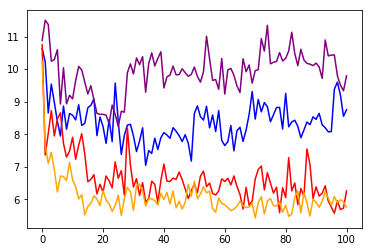

In [63]:
plt.plot(chA, color = 'blue')
plt.plot(chB, color = 'purple')
plt.plot(CHa, color = 'red')
plt.plot(CHb, color = 'orange')

In [52]:
a1 = []
a2 = []
b1 = []
b2 = []

for ts in u.trajectory:
    a1.append(dis('resid 249 and segid A and name CA', 'resid 316 and segid A', protein))
    a2.append(dis('resid 244 245 and segid A', 'resid 319 and segid A', protein))
    b1.append(dis('resid 249 and segid B and name CA', 'resid 316 and segid B', protein))
    b2.append(dis('resid 244 245 and segid B', 'resid 319 and segid B', protein))
    
av_a1 = running_mean(a1, 10)
av_a2 = running_mean(a2, 10)
av_b1 = running_mean(b1, 10)
av_b2 = running_mean(b2, 10)

In [64]:
A1 = []
A2 = []
B1 = []
B2 = []

for ts in u2.trajectory:
    A1.append(dis('resid 249 and segid A and name CA', 'resid 316 and segid A', prot2))
    A2.append(dis('resid 244 245 and segid A', 'resid 319 and segid A', prot2))
    B1.append(dis('resid 249 and segid B and name CA', 'resid 316 and segid B', prot2))
    B2.append(dis('resid 244 245 and segid B', 'resid 319 and segid B', prot2))
    
av_A1 = running_mean(A1, 10)
av_A2 = running_mean(A2, 10)
av_B1 = running_mean(B1, 10)
av_B2 = running_mean(B2, 10)

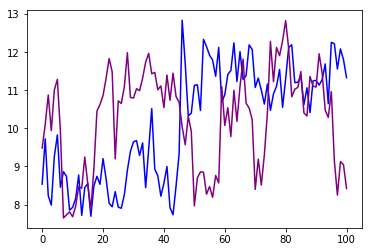

In [39]:
plt.plot(a1, color = 'blue')
plt.plot(b1, color = 'purple')

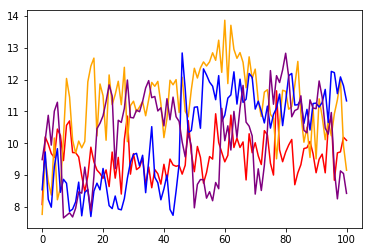

In [65]:
plt.plot(A1, color = 'red')
plt.plot(B1, color = 'orange')
plt.plot(a1, color = 'blue')
plt.plot(b1, color = 'purple')

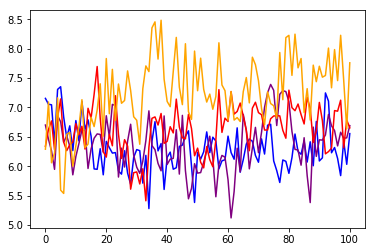

In [66]:
plt.plot(a2, color = 'blue')
plt.plot(b2, color = 'purple')
plt.plot(A2, color = 'red')
plt.plot(B2, color = 'orange')

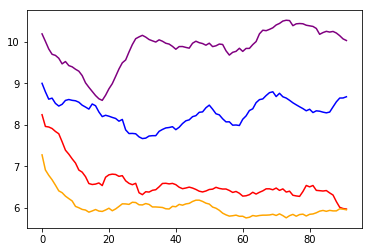

In [67]:
plt.plot(av_chA, color = 'blue')
plt.plot(av_chB, color = 'purple')
plt.plot(av_CHa, color = 'red')
plt.plot(av_CHb, color = 'orange')

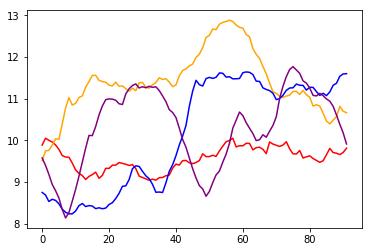

In [68]:
plt.plot(av_A1, color = 'red')
plt.plot(av_B1, color = 'orange')
plt.plot(av_a1, color = 'blue')
plt.plot(av_b1, color = 'purple')

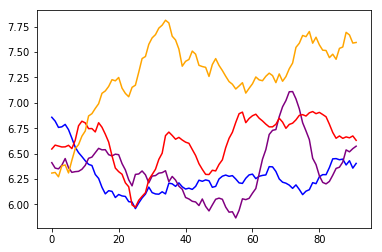

In [69]:
plt.plot(av_a2, color = 'blue')
plt.plot(av_b2, color = 'purple')
plt.plot(av_A2, color = 'red')
plt.plot(av_B2, color = 'orange')

In [70]:
xchA = []
xchB = []

for ts in u.trajectory:
    xchA.append(dis('resid 215 and segid A', 'resid 244 and segid A', protein))
    xchB.append(dis('resid 215 and segid B', 'resid 244 and segid B', protein))
    
av_xchA = running_mean(xchA, 10)
av_xchB = running_mean(xchB, 10)

xCHa = []
xCHb = []

for ts in u2.trajectory:    
    xCHa.append(dis('resid 215 and segid A', 'resid 244 and segid A', prot2))
    xCHb.append(dis('resid 215 and segid B', 'resid 244 and segid B', prot2))
    
av_xCHa = running_mean(xCHa, 10)
av_xCHb = running_mean(xCHb, 10)

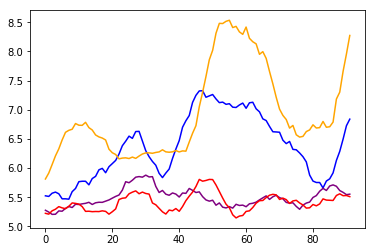

In [71]:
plt.plot(av_xchA, color = 'blue')
plt.plot(av_xchB, color = 'purple')
plt.plot(av_xCHa, color = 'red')
plt.plot(av_xCHb, color = 'orange')